<a href="https://colab.research.google.com/github/ibrahimmhammed/Learning_projects/blob/main/Black_Friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing libraries

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings("ignore")

# Reading Files

In [95]:
train_df= pd.read_csv("//content//train_black_friday.csv")


#Data Exploration

In [96]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [97]:
train_df.shape , test_df.shape

((550068, 12), (233599, 10))

In [98]:
train_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [99]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [100]:
train_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# Data Visualization

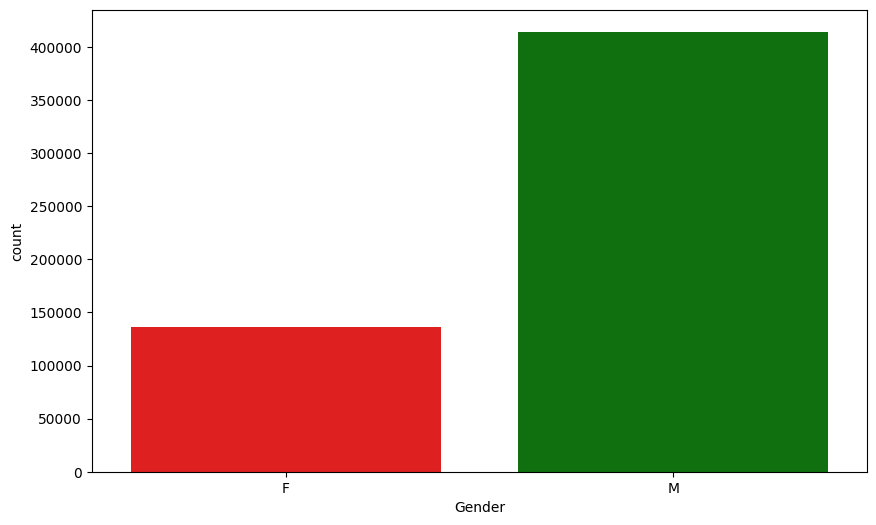

In [101]:
plt.figure(figsize=(10,6))
sns.countplot(data=train_df,x="Gender",palette=("r","g"))
plt.show()
#male and female counting

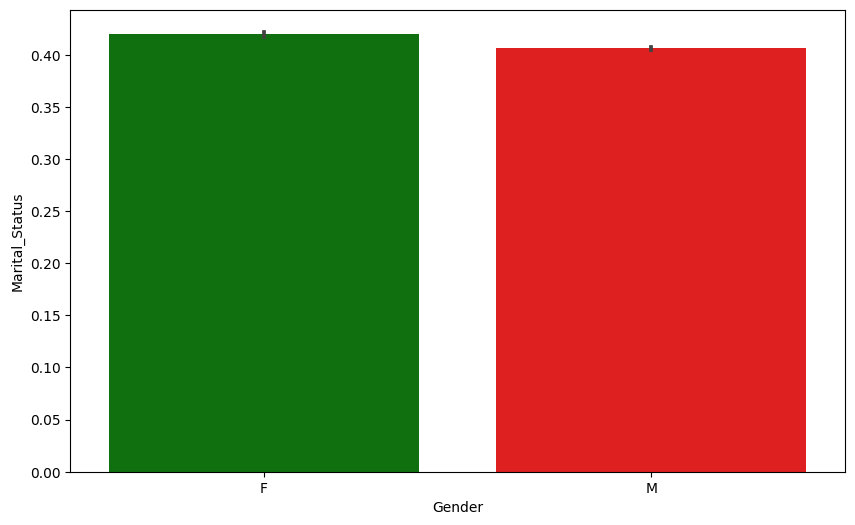

In [102]:
plt.figure(figsize=(10,6))
sns.barplot(data=train_df,x="Gender",y="Marital_Status",palette=("g","r"))
plt.show()
#martial_status depending on gender

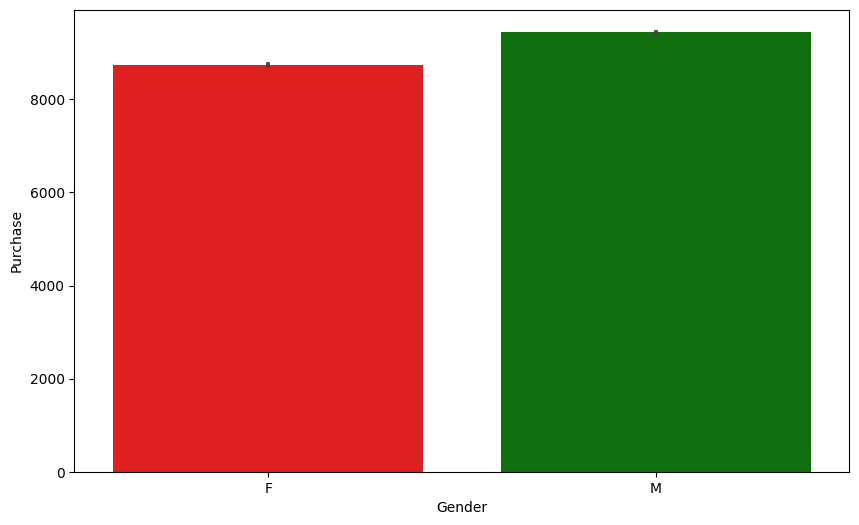

In [103]:
plt.figure(figsize=(10,6))
sns.barplot(data=train_df,x="Gender",y="Purchase",palette=("r","g"))
plt.show()
#purchasing depending on gender

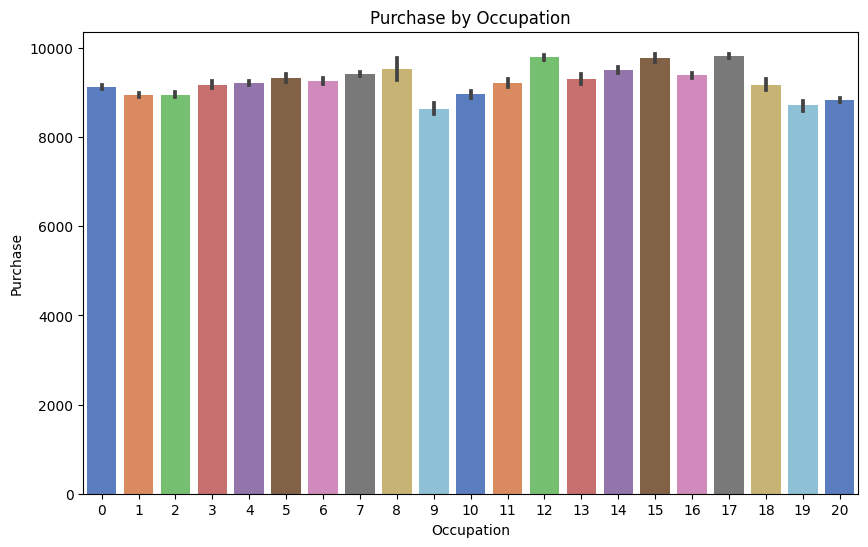

In [104]:
color_palette = sns.color_palette("muted", n_colors=len(train_df["Occupation"].unique()))

plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x="Occupation", y="Purchase", palette=color_palette)
plt.title("Purchase by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.show()
#every occupation purchasing (17 is the highest!)

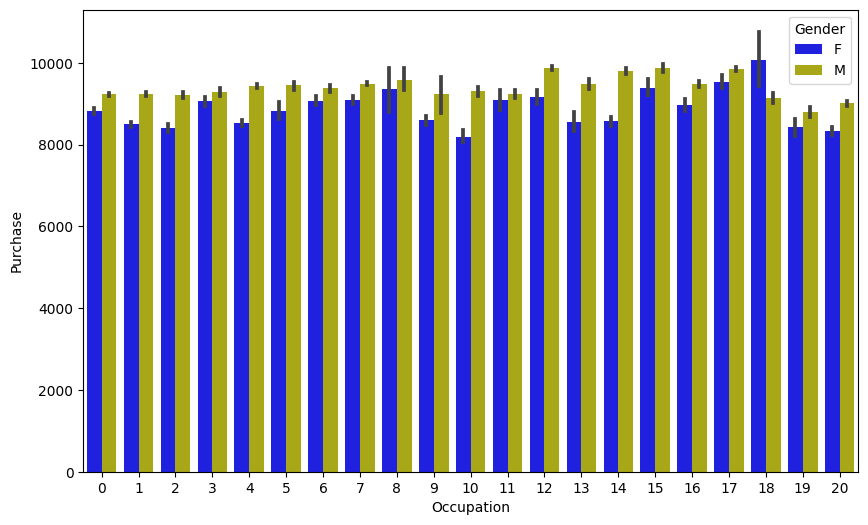

In [105]:
plt.figure(figsize=(10,6))
sns.barplot(data=train_df,x="Occupation",y="Purchase",hue="Gender",palette=("b","y"))
plt.show()
#every occupation purchasing depending on gender

# Detecting Outliers

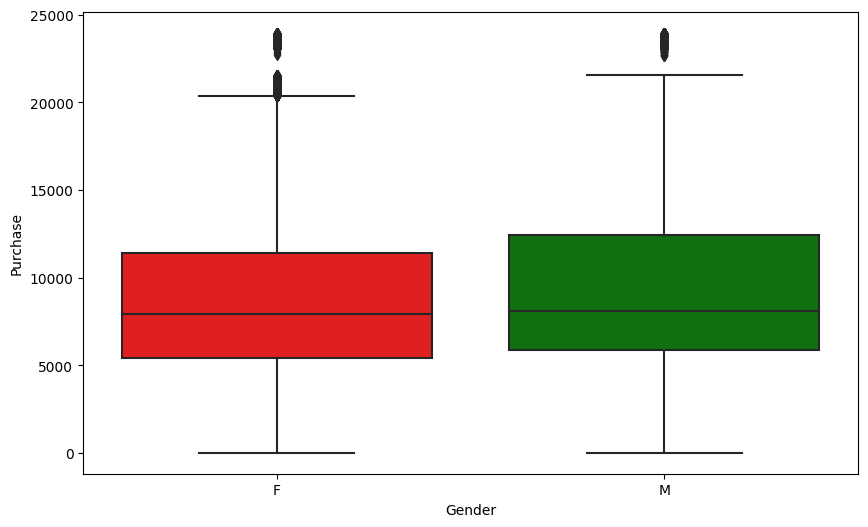

In [106]:
plt.figure(figsize=(10,6))
sns.boxplot(data= train_df, x="Gender",y="Purchase",palette=("r","g"))
plt.show()

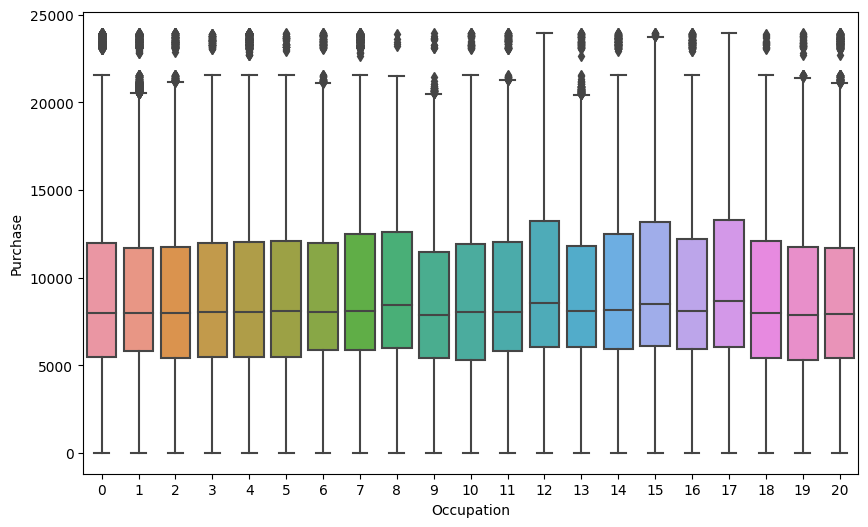

In [107]:
plt.figure(figsize=(10,6))
sns.boxplot(data= train_df, x="Occupation",y="Purchase")
plt.show()

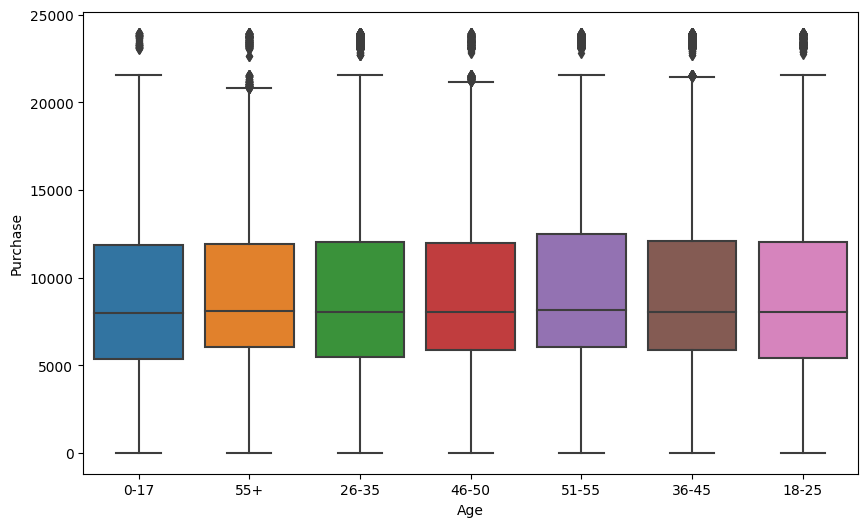

In [108]:
plt.figure(figsize=(10,6))
sns.boxplot(data= train_df, x="Age",y="Purchase")
plt.show()

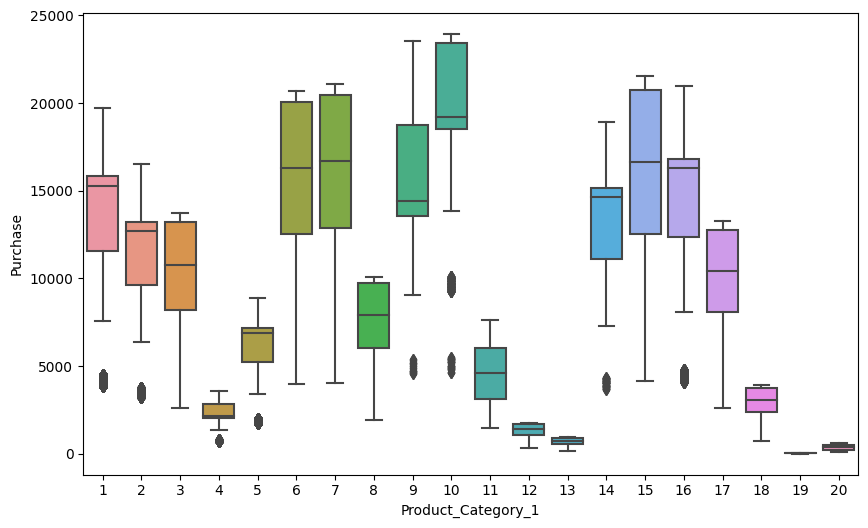

In [109]:
plt.figure(figsize=(10,6))
sns.boxplot(data= train_df, x="Product_Category_1",y="Purchase")
plt.show()

#Data Preproccesing

In [110]:
train_df["Product_ID"] = train_df["Product_ID"].str.replace("P00", "")
#deleting (p00) from product_id column

train_df["Product_ID"] = train_df["Product_ID"].astype(int)
#converting column type

train_df



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,87842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,85442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [111]:
train_df=train_df.drop(["Product_Category_3"],axis=1)
train_df
#droping column (product_category3) because it has many nulls

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,69042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,87842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,85442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,285442,M,55+,16,C,4+,0,8,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,372445,M,51-55,13,B,1,1,20,NaN,368
550064,1006035,375436,F,26-35,1,C,3,0,20,NaN,371
550065,1006036,375436,F,26-35,15,B,4+,1,20,NaN,137
550066,1006038,375436,F,55+,1,C,2,0,20,NaN,365


In [112]:
train_df["Product_Category_2"] = train_df["Product_Category_2"].fillna(train_df["Product_Category_2"]).mean()
train_df
#filling nulls in product category 2 with mean

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,69042,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,248942,F,0-17,10,A,2,0,1,9.842329,15200
2,1000001,87842,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,85442,F,0-17,10,A,2,0,12,9.842329,1057
4,1000002,285442,M,55+,16,C,4+,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,372445,M,51-55,13,B,1,1,20,9.842329,368
550064,1006035,375436,F,26-35,1,C,3,0,20,9.842329,371
550065,1006036,375436,F,26-35,15,B,4+,1,20,9.842329,137
550066,1006038,375436,F,55+,1,C,2,0,20,9.842329,365


In [113]:
train_df.isnull().sum()
#we cleaned all nulls

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [114]:
#converting data type
cat_col = ["Gender","Age","City_Category"]
le= LabelEncoder()

for i in cat_col:
  train_df[i]= le.fit_transform(train_df[i])

train_df.dtypes


User_ID                         int64
Product_ID                      int64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [115]:
train_df["Stay_In_Current_City_Years"] = train_df["Stay_In_Current_City_Years"].replace("4+","4")
#replacing +4 with 4

train_df["Stay_In_Current_City_Years"] = train_df["Stay_In_Current_City_Years"].astype(int)
#converting it to numerical

train_df.dtypes

User_ID                         int64
Product_ID                      int64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

#data distributaion

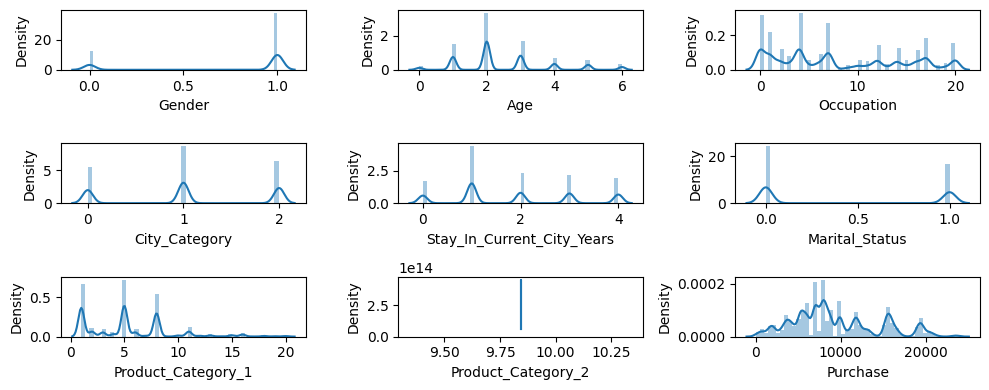

In [116]:
rows=3
cols=3
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
col=train_df.columns
index=2
for i in range(rows):
    for j in range(cols):
        sns.distplot(train_df[col[index]],ax=ax[i][j])
        index=index+1

plt.tight_layout()
## The distribution plot helps us to detect the skewness of the data.Below as it can be seen that the purchase column

In [ ]:
train_df['Purchase']=np.log(train_df['Purchase'])
# The log transformation will help us transform the data and change the data to normal distribution


# Creating Model

In [ ]:
x = train_df.drop(["Purchase"],axis=1)
y= train_df["Purchase"]
# x,y defining


In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42,shuffle=True)
# x,y spliting

In [120]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)
#scaling our data

In [121]:
#difining our algorithms

model1 = LinearRegression()
model2 = DecisionTreeRegressor(max_depth=9)
model3 = GradientBoostingRegressor(max_depth=9)

In [122]:
def testing(model): # to test all models and show their results
  model.fit(x_train,y_train)
  pred= model.predict(x_test)
  score=r2_score(y_test,pred)
  mae=mean_absolute_error(y_test,pred)
  mse=mean_squared_error(y_test,pred)
  rmse=(np.sqrt(mean_squared_error(y_test,pred)))
  print('r2_score: ',score)
  print('mean_absolute_error: ',mae)
  print('mean_squared_error: ',mse)
  print('root_mean_squared_error: ',rmse)


In [123]:
testing(model1)

r2_score:  0.19726898420316752
mean_absolute_error:  0.4530700749459868
mean_squared_error:  0.437961521577809
root_mean_squared_error:  0.661786613326236


In [124]:
testing(model2)

r2_score:  0.7115962343283826
mean_absolute_error:  0.2857970642149323
mean_squared_error:  0.15735003326977445
root_mean_squared_error:  0.396673711341922


In [125]:
testing(model3) #so Gradient Boosting is the best model !!!

r2_score:  0.7446948998030878
mean_absolute_error:  0.27857216321357275
mean_squared_error:  0.13929175271472777
root_mean_squared_error:  0.3732181034123717


# Appling Results (on test data)

**Frist, we have to deal with test data like train data**

In [126]:
test_df= pd.read_csv("//content//test_black_friday.csv")


In [127]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [128]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [129]:
test_df.shape

(233599, 11)

In [130]:
test_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [131]:
test_df["Product_ID"] = test_df["Product_ID"].str.replace("P00", "")
#deleting (p00) from product_id column

test_df["Product_ID"] = test_df["Product_ID"].astype(int)
#converting column type

test_df


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,53842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,31842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [132]:
test_df=test_df.drop(["Product_Category_3"],axis=1)
test_df
#droping column (product_category3) because it has many nulls

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,128942,M,46-50,7,B,2,1,1,11.0
1,1000009,113442,M,26-35,17,C,0,0,3,5.0
2,1000010,288442,F,36-45,1,B,4+,1,5,14.0
3,1000010,145342,F,36-45,1,B,4+,1,4,9.0
4,1000011,53842,F,26-35,1,C,1,0,4,5.0
...,...,...,...,...,...,...,...,...,...,...
233594,1006036,118942,F,26-35,15,B,4+,1,8,NaN
233595,1006036,254642,F,26-35,15,B,4+,1,5,8.0
233596,1006036,31842,F,26-35,15,B,4+,1,1,5.0
233597,1006037,124742,F,46-50,1,C,4+,0,10,16.0


In [133]:
test_df["Product_Category_2"] = test_df["Product_Category_2"].fillna(test_df["Product_Category_2"]).mean()
test_df
#filling nulls in product category 2 with mean

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,128942,M,46-50,7,B,2,1,1,9.849586
1,1000009,113442,M,26-35,17,C,0,0,3,9.849586
2,1000010,288442,F,36-45,1,B,4+,1,5,9.849586
3,1000010,145342,F,36-45,1,B,4+,1,4,9.849586
4,1000011,53842,F,26-35,1,C,1,0,4,9.849586
...,...,...,...,...,...,...,...,...,...,...
233594,1006036,118942,F,26-35,15,B,4+,1,8,9.849586
233595,1006036,254642,F,26-35,15,B,4+,1,5,9.849586
233596,1006036,31842,F,26-35,15,B,4+,1,1,9.849586
233597,1006037,124742,F,46-50,1,C,4+,0,10,9.849586


In [135]:
test_df.isnull().sum()
#we cleaned all nulls

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

In [136]:
#converting data type
cat_col = ["Gender","Age","City_Category"]
le= LabelEncoder()

for i in cat_col:
  test_df[i]= le.fit_transform(test_df[i])

test_df.dtypes

User_ID                         int64
Product_ID                      int64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
dtype: object

In [137]:
test_df["Stay_In_Current_City_Years"] = test_df["Stay_In_Current_City_Years"].replace("4+","4")
#replacing +4 with 4

test_df["Stay_In_Current_City_Years"] = test_df["Stay_In_Current_City_Years"].astype(int)
#converting it to numerical

test_df.dtypes

User_ID                         int64
Product_ID                      int64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
dtype: object

**Lets apply our algorithm (Gradient Boosting)**

In [138]:
test_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,128942,1,4,7,1,2,1,1,9.849586
1,1000009,113442,1,2,17,2,0,0,3,9.849586
2,1000010,288442,0,3,1,1,4,1,5,9.849586
3,1000010,145342,0,3,1,1,4,1,4,9.849586
4,1000011,53842,0,2,1,2,1,0,4,9.849586
...,...,...,...,...,...,...,...,...,...,...
233594,1006036,118942,0,2,15,1,4,1,8,9.849586
233595,1006036,254642,0,2,15,1,4,1,5,9.849586
233596,1006036,31842,0,2,15,1,4,1,1,9.849586
233597,1006037,124742,0,4,1,2,4,0,10,9.849586


In [139]:
Gradient_Boosting = GradientBoostingRegressor()
Gradient_Boosting.fit(x_train,y_train)


GradientBoostingRegressor()

In [140]:
predicting= Gradient_Boosting.predict(test_df)


In [141]:
#final results
user_ID = test_df.User_ID
product_ID= test_df.Product_ID
new_df = pd.DataFrame({"user_id":user_ID,"product_id":product_ID,"Purchase":predicting})
new_df


,user_id,product_id,Purchase
0,1000004,128942,9.496578
1,1000009,113442,9.170818
2,1000010,288442,5.749087
3,1000010,145342,5.749087
4,1000011,53842,5.749087
...,...,...,...
233594,1006036,118942,5.749087
233595,1006036,254642,5.749087
233596,1006036,31842,9.496578
233597,1006037,124742,5.749087
